In [67]:
import torch
import matplotlib.pyplot as plt

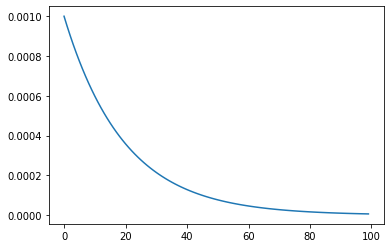

In [70]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=.001)
factor = .95
epochs = 100
lambda1 = lambda epoch: factor ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

lrs = []

for i in range(epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print("Factor = ", factor ** i," , Learning Rate = ", optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(epochs),lrs)
plt.show()

In [ ]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.998 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print(f"{i}, Learning Rate: {optimizer.param_groups[0]['lr']}")
    scheduler.step()

plt.plot(range(100),lrs)

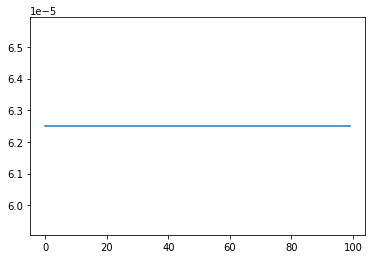

In [66]:
from fairseq.optim.lr_scheduler.polynomial_decay_schedule import PolynomialDecaySchedule
from fairseq.optim.adam import FairseqAdam
model = torch.nn.Linear(2, 1)

class Object(object):
    pass

optim_args = Object()
optim_args.lr = [0.001]
optim_args.adam_betas = "(0.9, 0.98)"
optim_args.adam_eps = 1e-06
optim_args.weight_decay = 0.01

scheduler_args = Object()
scheduler_args.lr = 0.0025, 
scheduler_args.warmup_updates = 40
scheduler_args.total_num_update = 100
scheduler_args.end_learning_rate = 0.0
scheduler_args.power = .1


optimizer = FairseqAdam(optim_args, params=model.parameters())
scheduler = PolynomialDecaySchedule(scheduler_args, optimizer=optimizer)

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print(f"{i}, Learning Rate: {optimizer.param_groups[0]['lr']}")
    scheduler.step(i)

plt.plot(range(100),lrs)

In [5]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

x = torch.randn(20, 5) #The input is expected to contain raw, unnormalized scores for each class.

y = torch.randint(0, 5, (20,))
print(y)

labels = np.unique(y)
print(labels)
class_weights = compute_class_weight("balanced", classes=labels, y=y.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float)
print(class_weights)

tensor([0, 0, 3, 0, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 0, 2, 4, 4, 0])
[0 2 3 4]
tensor([0.7143, 1.2500, 0.7143, 2.5000])


In [1]:
import torch

class NoamOpt:
    "Optim wrapper that implements rate."
    def __init__(self, model_size, factor, warmup, optimizer):
        self.optimizer = optimizer
        self._step = 0
        self.warmup = warmup
        self.factor = factor
        self.model_size = model_size
        self._rate = 0
        
    def step(self):
        "Update parameters and rate"
        self._step += 1
        rate = self.rate()
        for p in self.optimizer.param_groups:
            p['lr'] = rate
        self._rate = rate
        self.optimizer.step()
        
    def rate(self, step = None):
        "Implement `lrate` above"
        if step is None:
            step = self._step
        return self.factor * \
            (self.model_size ** (-0.5) *
            min(step ** (-0.5), step * self.warmup ** (-1.5)))
        
def get_std_opt(model):
    return NoamOpt(model.src_embed[0].d_model, 2, 4000,
            torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9))


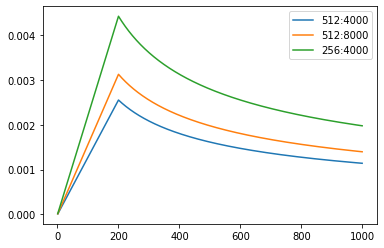

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Three settings of the lrate hyperparameters.
opts = [NoamOpt(768, 1, 200, None), 
        NoamOpt(512, 1, 200, None),
        NoamOpt(256, 1, 200, None)]
plt.plot(np.arange(1, 1000), [[opt.rate(i) for opt in opts] for i in range(1, 1000)])
plt.legend(["512:4000", "512:8000", "256:4000"])

In [24]:
import torch
linear = torch.nn.Linear(3, 1)
classifier = torch.nn.Linear(3, 5)

last_hidden_state = torch.rand([2, 5, 3])
activation = torch.tanh(last_hidden_state) 
print(activation.shape)

score = linear(activation)                  # Shape is [batch_size, seq_len, 1]   
print(score.shape)     
weights = torch.softmax(score, dim=1)
print(weights.shape)
x = torch.sum(weights * last_hidden_state, dim=1)
print(x.shape)

out = classifier(x)
print(out.shape)

torch.Size([2, 5, 3])
torch.Size([2, 5, 1])
torch.Size([2, 5, 1])
torch.Size([2, 3])
torch.Size([2, 5])


In [1]:
def fun1(x, fun):
    return fun(x)+1

def fun2(x):
    return x*2
    
fun1(5, lambda x: fun2(x))


11